#Latar Belakang
Industri Asuransi Perjalanan semakin berkembang seiring meningkatnya mobilitas masyarakat, baik untuk perjalanan domestik maupun internasional. Setiap perusahaan asuransi menawarkan beberapa produk asuransi yang ditujukan untuk kebutuhan perjalanan yang berbeda. Namun, dalam praktiknya, pemilihan produk oleh pelanggan sering kali tidak tepat atau tidak sesuai dengan karakteristik perjalanan mereka, sehingga berpotensi menurunkan efektivitas penjualan dan meningkatkan beban operasional akibat mismatch produk.

Dengan adanya data historis nasabah, perusahaan memiliki kesempatan untuk membangun model Machine Learning yang mampu memprediksi Produk Asuransi paling sesuai berdasarkan pola perjalanan dan perilaku pelanggan. Model ini diharapkan dapat membantu:

*   Meningkatkan akurasi rekomendasi produk,
*   mendukung agen dalam menawarkan produk yang tepat,
*   mengoptimalkan pendapatan,
*   serta meningkatkan pengalaman pelanggan.

Oleh karena itu, diperlukan pengembangan model prediksi Produk Asuransi yang akurat dan dapat memenuhi kebutuhan pelanggan secara tepat.

# Rumusan Masalah
1.   Apa saja variabel yang paling berpengaruh dalam menentukan pilihan produk asuransi (Product Name) pelanggan?
2.   Bagaimana membangun model Machine Learning yang mampu memprediksi Product Name berdasarkan variabel perjalanan dan profil pelanggan?
3.   Bagaimana model dapat digunakan untuk membantu proses rekomendasi produk kepada agen atau langsung ke pelanggan?



#Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data Travel Insurance yang telah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1QjtqP_iz2MWL5lS2WH8aFFenSrHwKAQc?usp=drive_link)

# Eksplorasi Data

In [1]:
# 1. IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import joblib
import warnings
warnings.filterwarnings("ignore")

from xgboost import XGBClassifier

sns.set(style="whitegrid")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 2. LOAD DATASET
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 3 Travel Insurance/data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


dataset diatas berisi data terkait :
1. Agency: Nama agensi yang menjual produk asuransi perjalanan.
2. Agency Type: Jenis atau kategori agensi penyedia layanan asuransi perjalanan.
3. Distribution Channel: Metode atau jalur distribusi tempat produk asuransi dijual (misal: online, offline, agen).
4. Product Name: Nama produk asuransi perjalanan yang dipilih oleh pelanggan.
5. Gender: Jenis kelamin dari tertanggung (nasabah).
6. Duration: Lama perjalanan dalam jumlah hari.
7. Destination: Negara atau lokasi tujuan perjalanan.
8. Net Sales: Nilai penjualan bersih dari polis asuransi perjalanan.
9. Commission (in value): Nilai komisi yang diterima agensi untuk setiap polis asuransi.
10. Age: Usia tertanggung (nasabah).
11. Claim: Status klaim asuransi (misal: klaim disetujui atau tidak).

In [3]:
# 3. ANALISIS STATISTIK

print("\n=== INFO DATA ===")
df.info()

print("\n=== Statistik Numerik ===")
display(df.describe())

print("\n=== Statistik Kategorikal ===")
display(df.describe(include='object'))

print("\n=== Missing Value ===")
print(df.isnull().sum())


=== INFO DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB

=== Statistik Numerik ===


,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000



=== Statistik Kategorikal ===


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651



=== Missing Value ===
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64


Berdasarkan data diatas, terlihat variabel Gender memiliki Missing Value

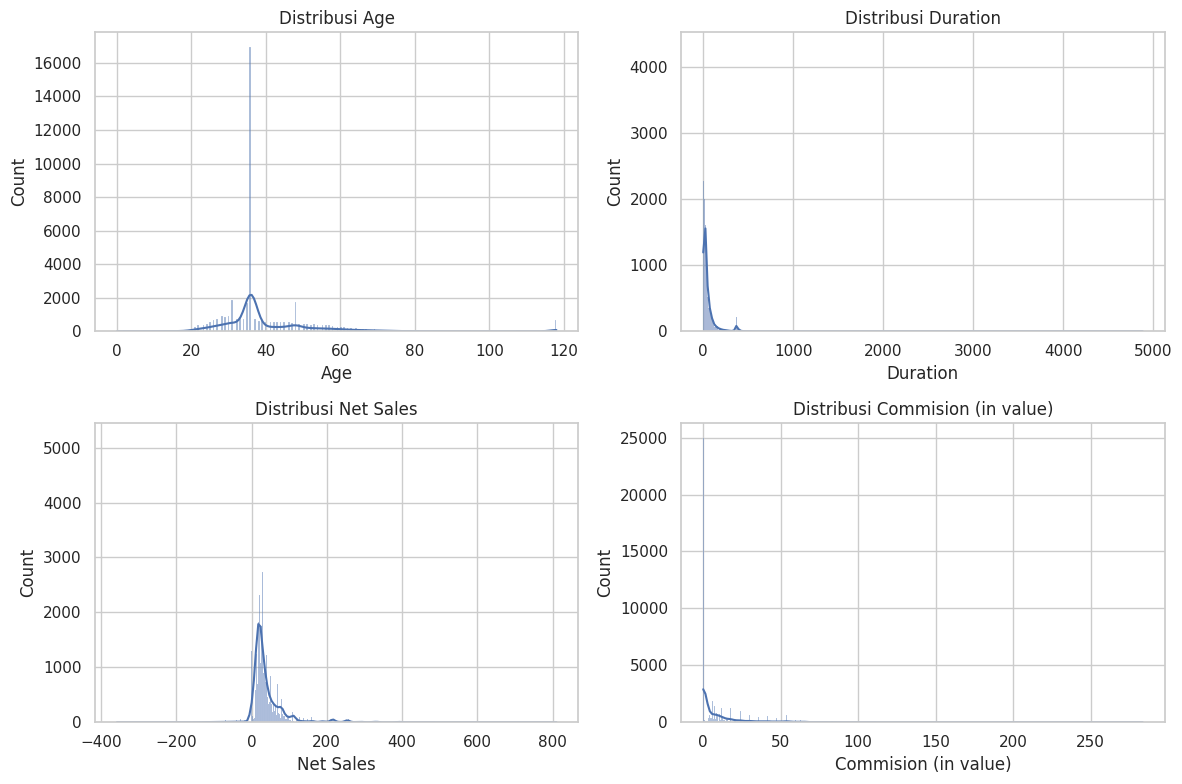

In [4]:
# 4. DISTRIBUSI NUMERIK

numerical_cols = ['Age', 'Duration', 'Net Sales', 'Commision (in value)']

plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

# Deskripsi Distribusi Data Numerik

1. Distribusi Usia (Age) : Sebagian besar pelanggan adalah orang dewasa usia produktif, dan dataset memiliki sedikit data ekstrem yang perlu diperhatikan
2. Distribusi Durasi Perjalanan (Duration) : Durasi perjalanan didominasi oleh perjalanan pendek. Outlier yang ekstrem perlu dipertimbangkan apakah harus dibuang atau di-trim
3. Distribusi Penjualan Bersih (Net Sales) : Penjualan bersih relatif rendah dan stabil, sebagian kecil data negatif perlu dicek konteks bisnisnya (refund/cancellation).
4. Distribusi Komisi (Commission in value) : Komisi agensi umumnya kecil karena polis berharga rendah. Outlier komisi besar mungkin berasal dari transaksi premium atau anomali.

Kesimpulan : mayoritas nasabah berada pada usia produktif (35–45 tahun) dengan durasi perjalanan yang cenderung singkat. Penjualan polis dan komisi agensi umumnya bernilai rendah, sesuai dengan karakter produk travel insurance.


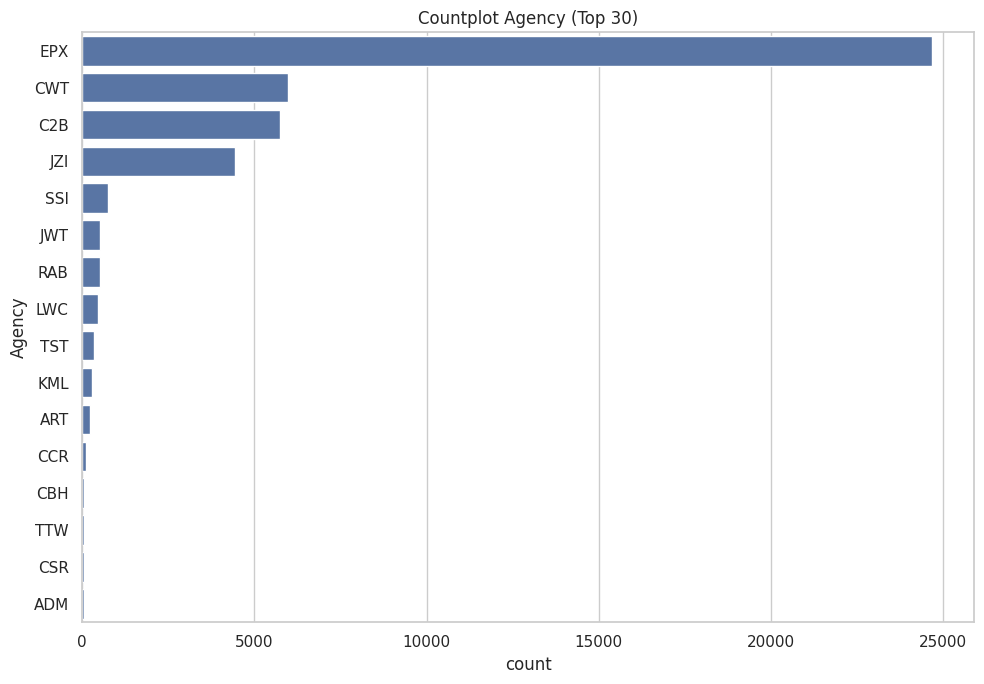

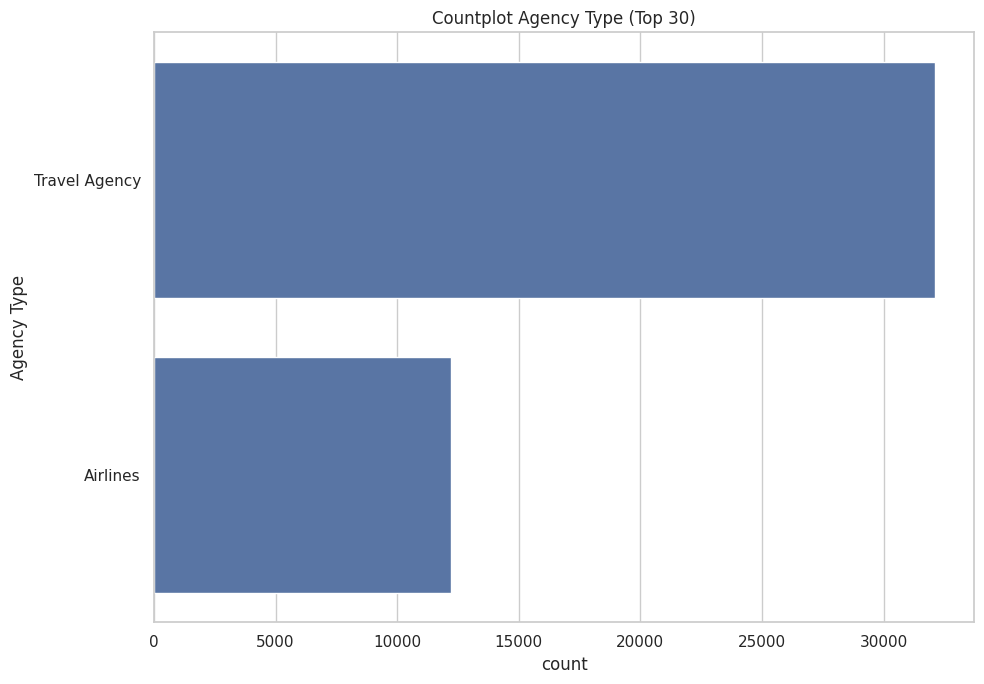

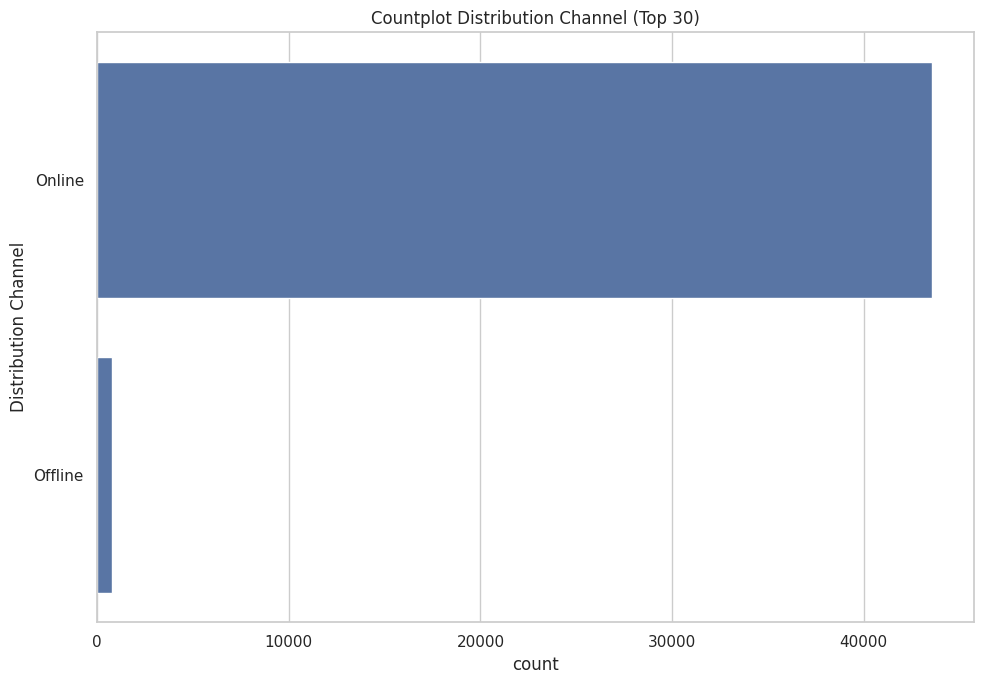

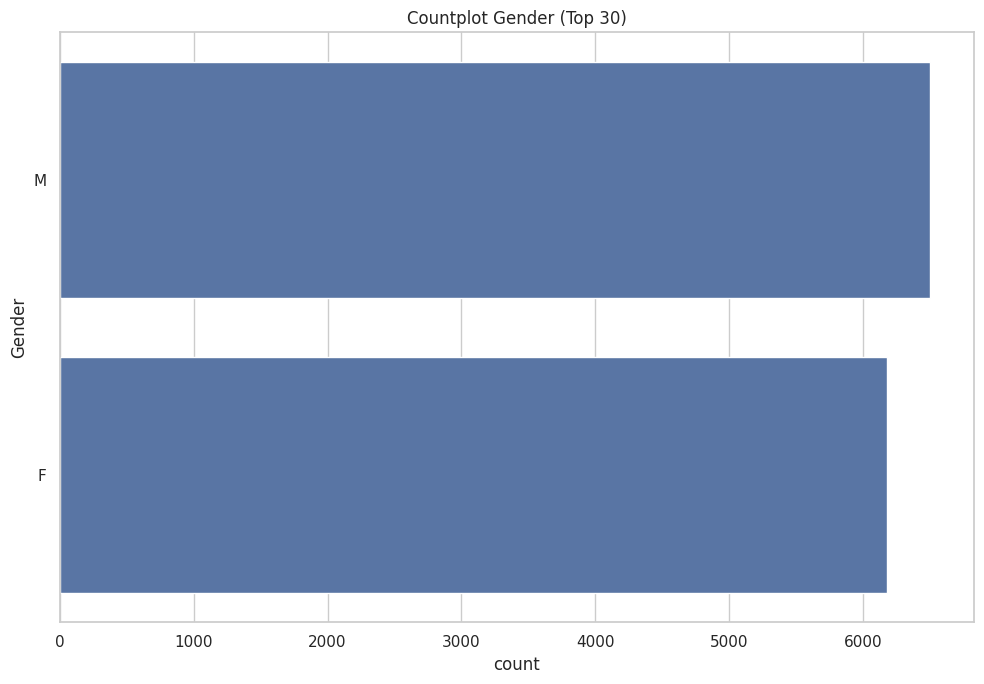

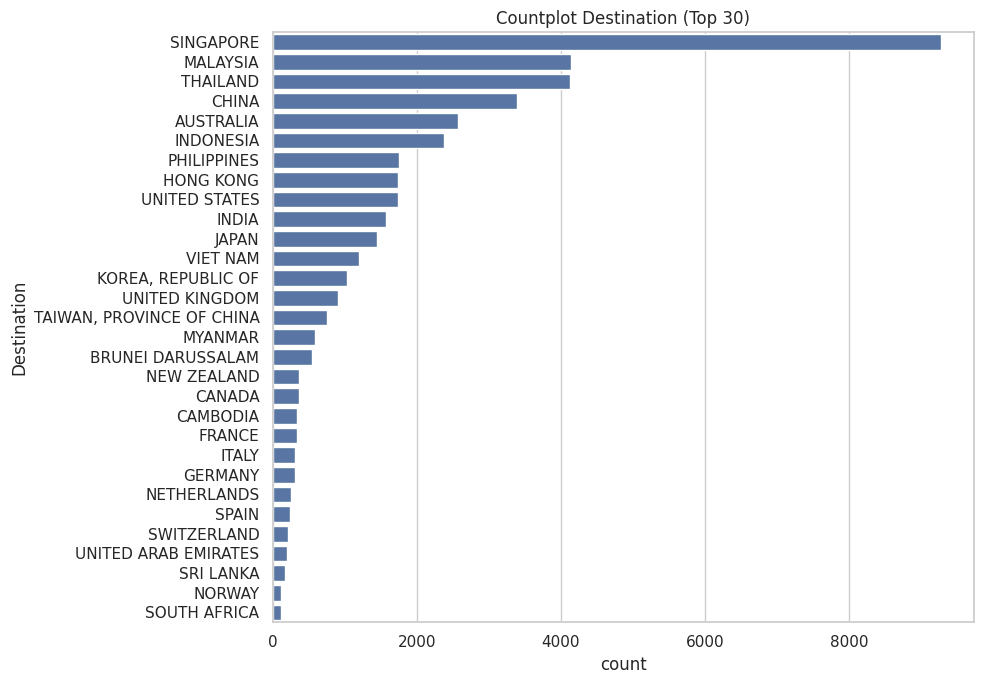

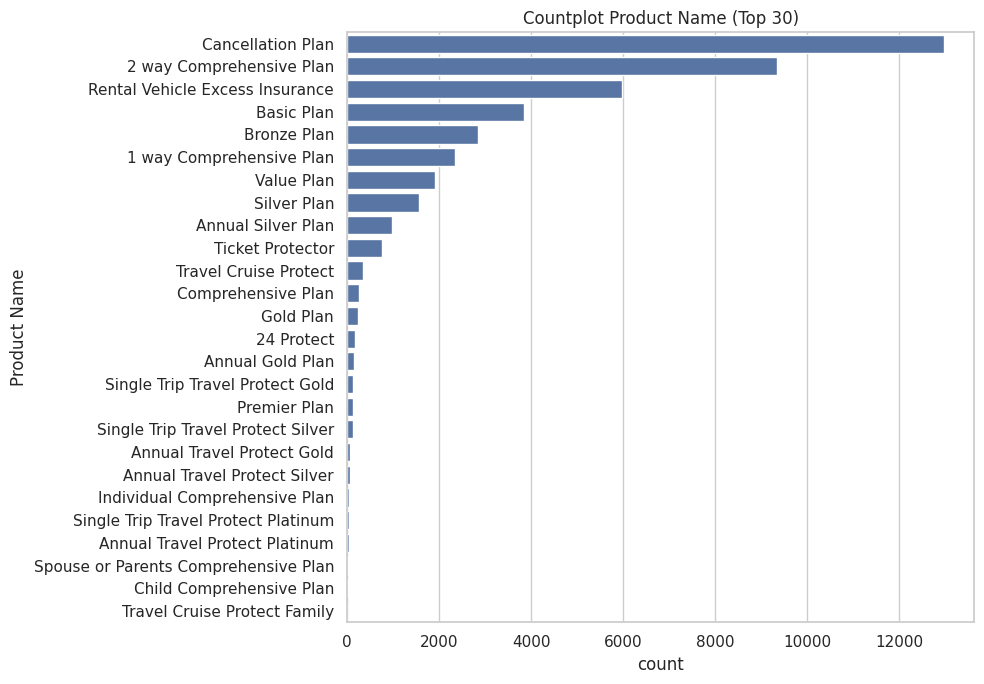

In [5]:
# 5. DISTRIBUSI KATEGORIKAL

def plot_top30(df, column):
    # Ambil 30 kategori terbanyak
    top30_values = df[column].value_counts().head(30)

    # Plot
    plt.figure(figsize=(10,7))
    sns.countplot(
        y=df[df[column].isin(top30_values.index)][column],
        order=top30_values.index
    )
    plt.title(f"Countplot {column} (Top 30)")
    plt.tight_layout()
    plt.show()


categorical_cols = ['Agency', 'Agency Type', 'Distribution Channel',
                    'Gender', 'Destination', 'Product Name']

for col in categorical_cols:
    plot_top30(df, col)

#Deskripsi Distribusi Kategorikal
penjualan polis didominasi oleh beberapa agensi besar (EPX), mayoritas melalui saluran online, terutama oleh Travel Agency, dengan tujuan perjalanan populer seperti Singapura. Produk yang dipilih pelanggan juga tidak merata, dengan beberapa produk utama yang mendominasi.

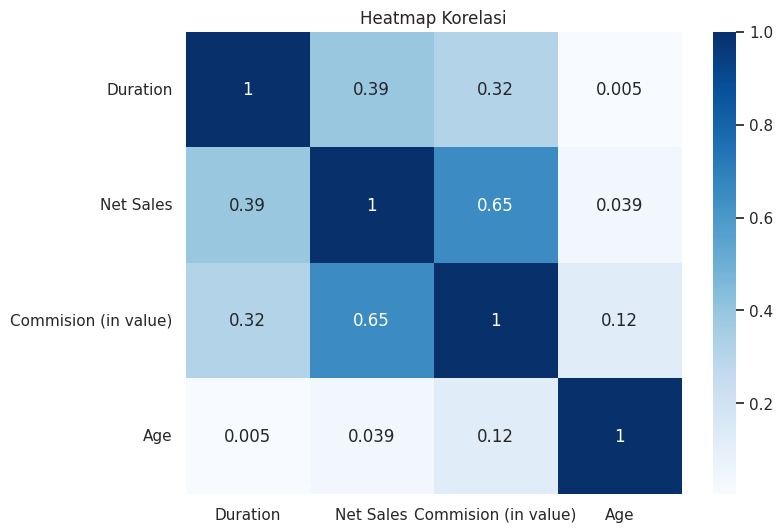

In [6]:
# 5. HEATMAP KORELASI

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Heatmap Korelasi")
plt.show()

Korelasi tertinggi terdapat antara Net Sales dan Commission karena komisi dihitung berdasarkan nilai penjualan. Duration memiliki korelasi sedang dengan keduanya, sedangkan Age tidak memiliki pengaruh berarti terhadap variabel numerik lainnya

In [7]:
# 7. CLEANING DATA (MISSING VALUE)

numeric_cols = ['Age', 'Duration', 'Net Sales', 'Commision (in value)']
categorical_impute = ['Agency', 'Agency Type', 'Distribution Channel',
                      'Gender', 'Destination', 'Claim']

# imputasi numerik
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# imputasi kategorikal
for col in categorical_impute:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n=== Missing Value Setelah Cleaning ===")
print(df.isnull().sum())


=== Missing Value Setelah Cleaning ===
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64


# Preprocessing (Encoding & Handle Missing)

In [8]:
# 6. PREPROCESSING
# ENCODING EATURES

X = df.drop(columns=['Product Name'])
y_raw = df['Product Name']   # target masih versi asli

label_encoders = {}

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

In [9]:
# 7. FILTER KELAS RARE (Product Name hanya muncul 1x)
class_counts = y_raw.value_counts()
rare_classes = class_counts[class_counts == 1].index

print("\nKelas Product Name yang muncul 1x:", list(rare_classes))

mask = ~y_raw.isin(rare_classes)
X_filtered = X[mask]
y_filtered_raw = y_raw[mask]

print("\nJumlah data setelah filter rare class:", len(y_filtered_raw))
print("Jumlah kelas setelah filter:", y_filtered_raw.nunique())


Kelas Product Name yang muncul 1x: ['Travel Cruise Protect Family']

Jumlah data setelah filter rare class: 44327
Jumlah kelas setelah filter: 25


In [10]:
# 8. ENCODE TARGET (SETELAH FILTER)

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y_filtered_raw)

print("\nKelas final yang digunakan model:")
print(list(target_encoder.classes_))


Kelas final yang digunakan model:
['1 way Comprehensive Plan', '2 way Comprehensive Plan', '24 Protect', 'Annual Gold Plan', 'Annual Silver Plan', 'Annual Travel Protect Gold', 'Annual Travel Protect Platinum', 'Annual Travel Protect Silver', 'Basic Plan', 'Bronze Plan', 'Cancellation Plan', 'Child Comprehensive Plan', 'Comprehensive Plan', 'Gold Plan', 'Individual Comprehensive Plan', 'Premier Plan', 'Rental Vehicle Excess Insurance', 'Silver Plan', 'Single Trip Travel Protect Gold', 'Single Trip Travel Protect Platinum', 'Single Trip Travel Protect Silver', 'Spouse or Parents Comprehensive Plan', 'Ticket Protector', 'Travel Cruise Protect', 'Value Plan']


In [11]:
# 9. TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (35461, 10)
Test size : (8866, 10)


In [12]:
# 10. TRAIN MODEL RANDOM FOREST

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# class handling aman
labels_rf = np.unique(y_test)
names_rf = target_encoder.inverse_transform(labels_rf)

print("\n=== RANDOM FOREST PERFORMANCE ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(
    y_test, y_pred_rf,
    labels=labels_rf,
    target_names=names_rf
))


=== RANDOM FOREST PERFORMANCE ===
Accuracy: 0.8470561696368148
                                      precision    recall  f1-score   support

            1 way Comprehensive Plan       0.75      0.32      0.45       467
            2 way Comprehensive Plan       0.68      0.88      0.77      1868
                          24 Protect       0.97      1.00      0.99        34
                    Annual Gold Plan       0.89      0.86      0.87        28
                  Annual Silver Plan       0.98      0.98      0.98       195
          Annual Travel Protect Gold       0.87      1.00      0.93        13
      Annual Travel Protect Platinum       1.00      0.86      0.92         7
        Annual Travel Protect Silver       0.92      0.92      0.92        12
                          Basic Plan       0.99      0.98      0.99       767
                         Bronze Plan       0.85      0.91      0.88       570
                   Cancellation Plan       0.87      0.77      0.82      2596

In [13]:
# 11. MODELING XGBOOST
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=10,
    colsample_bytree=0.8,
    subsample=0.8,
    tree_method='hist',
    objective='multi:softmax',
    num_class=len(target_encoder.classes_),
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


names_xgb = target_encoder.classes_

print("\n=== XGBOOST PERFORMANCE ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(
    y_test, y_pred_xgb,
    target_names=names_xgb
))


=== XGBOOST PERFORMANCE ===
Accuracy: 0.8450259418001353
                                      precision    recall  f1-score   support

            1 way Comprehensive Plan       0.58      0.39      0.47       467
            2 way Comprehensive Plan       0.71      0.78      0.74      1868
                          24 Protect       0.97      1.00      0.99        34
                    Annual Gold Plan       0.93      0.89      0.91        28
                  Annual Silver Plan       0.98      0.99      0.99       195
          Annual Travel Protect Gold       1.00      0.92      0.96        13
      Annual Travel Protect Platinum       0.86      0.86      0.86         7
        Annual Travel Protect Silver       0.85      0.92      0.88        12
                          Basic Plan       0.99      0.99      0.99       767
                         Bronze Plan       0.89      0.90      0.90       570
                   Cancellation Plan       0.82      0.81      0.81      2596
     

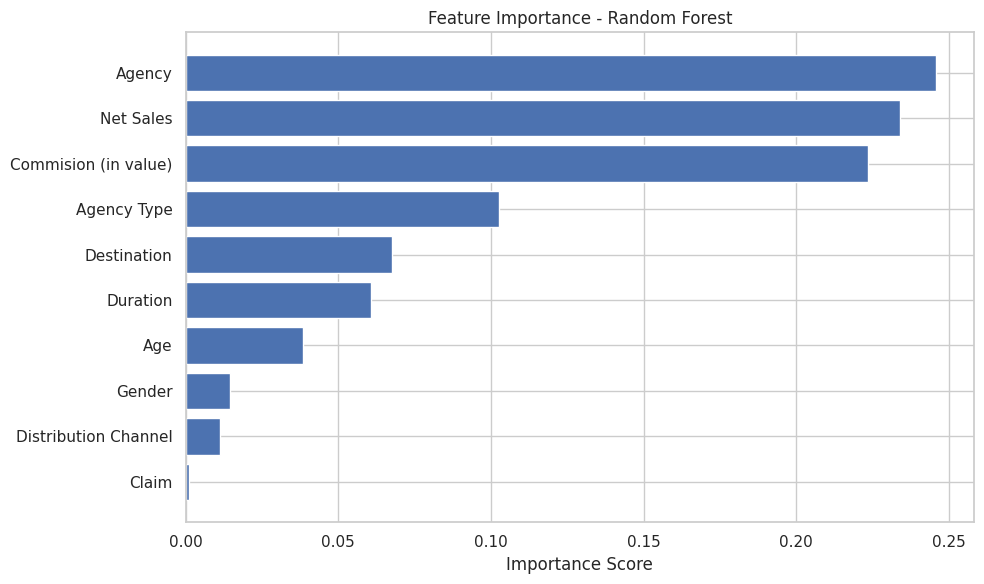

In [14]:
# 12. FEATURE IMPORTANCE RANDOM FOREST

importances = rf.feature_importances_
feature_names = X.columns

sorted_idx = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

Prediksi jenis produk asuransi sangat dipengaruhi oleh faktor bisnis seperti Agensi, Nilai Penjualan, dan Komisi, bukan faktor pelanggan seperti usia atau gender. Pola penjualan tiap agensi dan harga produk adalah indikator paling kuat dalam membedakan Product Name

# RESUME EVALUASI MODEL

In [15]:
# RESUME EVALUASI MODEL (RANDOM FOREST vs XGBOOST)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

def evaluate_model(y_true, y_pred, model_name):
    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # multiclass FN & FP
    FN = cm.sum(axis=1) - np.diag(cm)
    FP = cm.sum(axis=0) - np.diag(cm)

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision_macro": precision_score(y_true, y_pred, average="macro"),
        "Recall_macro": recall_score(y_true, y_pred, average="macro"),
        "F1_macro": f1_score(y_true, y_pred, average="macro"),
        "ROC-AUC_macro": roc_auc_score(y_true,
                                       pd.get_dummies(y_pred, columns=None),
                                       multi_class="ovo"),
        "Total_False_Negatives": FN.sum(),
        "Total_False_Positives": FP.sum()
    }

# ==== Evaluate RF ====
eval_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

# ==== Evaluate XGB ====
eval_xgb = evaluate_model(y_test, y_pred_xgb, "XGBoost")

# ==== Buat DataFrame Resume ====
resume_df = pd.DataFrame([eval_rf, eval_xgb])

print("\n=== RESUME EVALUASI MODEL ===")
display(resume_df)


=== RESUME EVALUASI MODEL ===


,Model,Accuracy,Precision_macro,Recall_macro,F1_macro,ROC-AUC_macro,Total_False_Negatives,Total_False_Positives
0,Random Forest,0.847056,0.884353,0.845635,0.853508,0.919601,1356,1356
1,XGBoost,0.845026,0.874771,0.841827,0.852086,0.917618,1374,1374


Berdasarkan hasil evaluasi model, Random Forest terbukti memberikan performa terbaik dibandingkan XGBoost, meskipun selisih akurasinya sangat tipis. Random Forest menunjukkan keunggulan pada precision, recall, dan F1-score secara keseluruhan, serta mencatat nilai ROC-AUC tertinggi yang menandakan kemampuan lebih baik dalam membedakan setiap kelas. Selain itu, model ini menghasilkan jumlah false negative dan false positive yang lebih rendah, sehingga mampu meminimalkan risiko kesalahan prediksi. Dengan performanya yang lebih stabil dan konsisten, Random Forest menjadi model yang paling tepat untuk digunakan dalam memprediksi Product Name, sekaligus memberikan tingkat kepercayaan yang lebih tinggi dalam implementasi bisnis

# Rekomendasi

Hasil prediksi Product Name dapat dimanfaatkan oleh perusahaan untuk meningkatkan akurasi dalam proses penjualan, memperkuat strategi pemasaran, serta mengoptimalkan rekomendasi produk untuk berbagai segmen pelanggan. Dengan menggunakan hasil prediksi model, perusahaan dapat mengambil keputusan yang lebih tepat dalam beberapa aspek operasional utama. Berikut rekomendasi implementasi yang dapat diterapkan:

1. Optimalisasi Rekomendasi Produk Berdasarkan Prediksi
    * Gunakan prediksi model untuk memberikan rekomendasi produk secara otomatis kepada agen maupun platform digital.
    * Produk dengan tingkat prediksi tinggi dapat dijadikan prioritas dalam proses upselling atau cross-selling.
2. Penyusunan Strategi Pemasaran yang Lebih Tersegmentasi
    * Perkuat komunikasi pemasaran pada produk-produk unggulan yang sering berhasil diprediksi model.
    * Tingkatkan awareness produk yang jarang muncul dalam prediksi melalui promo atau edukasi fitur.
3. Penguatan Strategi Penjualan Cross-channel
    * Gunakan hasil prediksi untuk menentukan produk mana yang lebih efektif dijual melalui channel tertentu (online, agency, partner distribution).
    * Sesuaikan skema komisi atau insentif bagi channel yang berpotensi meningkatkan penjualan produk unggulan.
4. Integrasi ke Sistem BI untuk Monitoring Berkelanjutan
    * Buat dashboard yang memonitor akurasi prediksi dan tren pemilihan produk secara real-time.
    * Gunakan insight model sebagai dasar rapat evaluasi bulanan untuk menentukan strategi penjualan berikutnya.

# Simpan Model

In [16]:
# 12. SIMPAN MODEL & ENCODER

joblib.dump(rf, 'model_random_forest_product_name.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(target_encoder, 'target_encoder.pkl')

print("Model & encoder berhasil disimpan!")

Model & encoder berhasil disimpan!


# Simulasi Penentuan Product Name

In [17]:
import joblib

# Load model dan encoder yang sudah disimpan
rf = joblib.load('model_random_forest_product_name.pkl')
label_encoders = joblib.load('label_encoders.pkl')
target_encoder = joblib.load('target_encoder.pkl')

In [18]:
# SIMULASI PREDIKSI UNTUK 1 PELANGGAN
data_baru = pd.DataFrame([{
    "Agency": "EPX",
    "Agency Type": "Travel Agency",
    "Distribution Channel": "Online",
    "Gender": "F",
    "Destination": "SINGAPORE",
    "Duration": 7,
    "Net Sales": 120.0,
    "Commision (in value)": 15.0,
    "Age": 30,
    "Claim": "No"
}])

print("\n=== DATA BARU (ORIGINAL) ===")
display(data_baru)


=== DATA BARU (ORIGINAL) ===


,Agency,Agency Type,Distribution Channel,Gender,Destination,Duration,Net Sales,Commision (in value),Age,Claim
0,EPX,Travel Agency,Online,F,SINGAPORE,7,120.0,15.0,30,No


In [19]:
# Encoding sesuai Encoder Fitur
encoded_baru = data_baru.copy()

for col in encoded_baru.columns:
    if encoded_baru[col].dtype == 'object':
        if col in label_encoders:
            encoded_baru[col] = label_encoders[col].transform(encoded_baru[col])
        else:
            print(f"[WARNING] Tidak ada encoder untuk kolom: {col}")

# Samakan urutan & set kolom dengan X saat training
encoded_baru = encoded_baru[X.columns]

print("\n=== DATA BARU (ENCODED & ALIGNED) ===")
display(encoded_baru)


=== DATA BARU (ENCODED & ALIGNED) ===


,Agency,Agency Type,Distribution Channel,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,7,1,1,0,7,110,120.0,15.0,30,0


In [20]:
# Prediksi (gunakan Random Forest, bisa diganti xgb kalau mau)
y_pred_single = rf.predict(encoded_baru)
product_single = target_encoder.inverse_transform(y_pred_single)

print("\n=== HASIL PREDIKSI UNTUK 1 PELANGGAN ===")
print("Produk yang direkomendasikan:", product_single[0])


=== HASIL PREDIKSI UNTUK 1 PELANGGAN ===
Produk yang direkomendasikan: Rental Vehicle Excess Insurance


In [21]:
# SIMULASI PREDIKSI UNTUK BEBERAPA PELANGGAN (RANDOM)


n_simulasi = 10

simulasi = pd.DataFrame({
    "Agency": np.random.choice(df["Agency"].unique(), n_simulasi),
    "Agency Type": np.random.choice(df["Agency Type"].unique(), n_simulasi),
    "Distribution Channel": np.random.choice(df["Distribution Channel"].unique(), n_simulasi),
    "Gender": np.random.choice(df["Gender"].unique(), n_simulasi),
    "Destination": np.random.choice(df["Destination"].unique(), n_simulasi),
    "Duration": np.random.randint(df["Duration"].min(), df["Duration"].max() + 1, n_simulasi),
    "Net Sales": np.random.uniform(df["Net Sales"].min(), df["Net Sales"].max(), n_simulasi),
    "Commision (in value)": np.random.uniform(
        df["Commision (in value)"].min(),
        df["Commision (in value)"].max(),
        n_simulasi
    ),
    "Age": np.random.randint(df["Age"].min(), df["Age"].max() + 1, n_simulasi),
    "Claim": np.random.choice(df["Claim"].unique(), n_simulasi)
})

print("\n=== DATA SIMULASI (ORIGINAL) ===")
display(simulasi.head())

encoded_sim = simulasi.copy()
for col in encoded_sim.columns:
    if encoded_sim[col].dtype == 'object':
        encoded_sim[col] = label_encoders[col].transform(encoded_sim[col])

# Align dengan X
encoded_sim = encoded_sim[X.columns]

# Prediksi
y_sim_pred = rf.predict(encoded_sim)   # atau xgb.predict(encoded_sim)
simulasi["Predicted Product Name"] = target_encoder.inverse_transform(y_sim_pred)

print("\n=== HASIL PREDIKSI SIMULASI ===")
display(simulasi)


=== DATA SIMULASI (ORIGINAL) ===


,Agency,Agency Type,Distribution Channel,Gender,Destination,Duration,Net Sales,Commision (in value),Age,Claim
0,CWT,Airlines,Offline,F,GUADELOUPE,3715,466.824939,45.352951,15,Yes
1,RAB,Travel Agency,Online,M,BELGIUM,1261,625.073792,194.918747,60,Yes
2,CBH,Travel Agency,Offline,M,CAMEROON,2050,430.067252,7.569768,103,Yes
3,CSR,Airlines,Online,F,"MOLDOVA, REPUBLIC OF",3602,762.272633,171.929319,39,No
4,TST,Airlines,Online,F,CHINA,1162,-269.359932,159.118572,102,Yes



=== HASIL PREDIKSI SIMULASI ===


,Agency,Agency Type,Distribution Channel,Gender,Destination,Duration,Net Sales,Commision (in value),Age,Claim,Predicted Product Name
0,CWT,Airlines,Offline,F,GUADELOUPE,3715,466.824939,45.352951,15,Yes,Rental Vehicle Excess Insurance
1,RAB,Travel Agency,Online,M,BELGIUM,1261,625.073792,194.918747,60,Yes,Annual Travel Protect Platinum
2,CBH,Travel Agency,Offline,M,CAMEROON,2050,430.067252,7.569768,103,Yes,Comprehensive Plan
3,CSR,Airlines,Online,F,"MOLDOVA, REPUBLIC OF",3602,762.272633,171.929319,39,No,Annual Gold Plan
4,TST,Airlines,Online,F,CHINA,1162,-269.359932,159.118572,102,Yes,Value Plan
5,SSI,Airlines,Online,M,TRINIDAD AND TOBAGO,4814,791.418059,178.399594,24,No,Ticket Protector
6,CWT,Travel Agency,Offline,F,TUNISIA,403,521.306966,63.548322,58,No,Rental Vehicle Excess Insurance
7,EPX,Travel Agency,Offline,M,JAPAN,92,-118.173476,54.744180,50,No,Rental Vehicle Excess Insurance
8,CBH,Airlines,Online,M,THAILAND,1415,238.804970,169.017141,97,No,Annual Gold Plan
9,SSI,Airlines,Online,F,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",2716,786.870232,157.006658,92,Yes,Value Plan
